In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats

In [2]:
data=pd.read_csv("person1-step-data.csv")

In [3]:
data.head(5)

,Source,Date,Hour,Count
0,Person1 iPhone SE,2014-12-07,8,13
1,Person1 iPhone SE,2014-12-07,8,13
2,Person1 iPhone SE,2014-12-07,8,1
3,Person1 iPhone SE,2014-12-07,8,9
4,Person1 iPhone SE,2014-12-07,8,15


In [4]:
data['Hour'].describe().round(2)

count    183787.00
mean         12.71
std           4.88
min           0.00
25%           9.00
50%          12.00
75%          16.00
max          23.00
Name: Hour, dtype: float64

In [5]:
data['Count'].describe().round(2)

count    183787.00
mean         79.79
std         358.10
min           1.00
25%           6.00
50%          17.00
75%          35.00
max       88359.00
Name: Count, dtype: float64

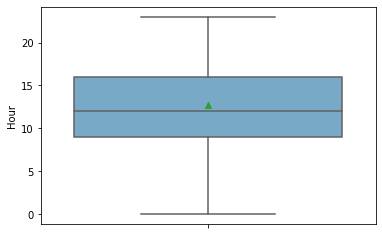

In [6]:
ax = sns.boxplot(y='Hour', data=data, palette='Blues', showmeans=True)